In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plot
from matplotlib import style

In [23]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv("C:/Users/ASUS/Desktop/Backorder/Backorder.csv")

In [25]:
df

,product_id,current_inventory,transit_duration,transit_quantity,forecast_sales_3_months,forecast_sales_6_months,forecast_sales_9_months,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,...,source_overdue,source_performance_6_months,source_performance_12_months,stock_overdue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.84,0.83,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.84,0.83,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.84,0.83,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,1407754,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,...,0.0,0.69,0.69,5.0,Yes,No,No,Yes,No,No
1687856,1373987,-1.0,8.0,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,0.84,0.83,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No


In [26]:
print("df shape:",df.shape)

df shape: (1687860, 23)


<AxesSubplot:>

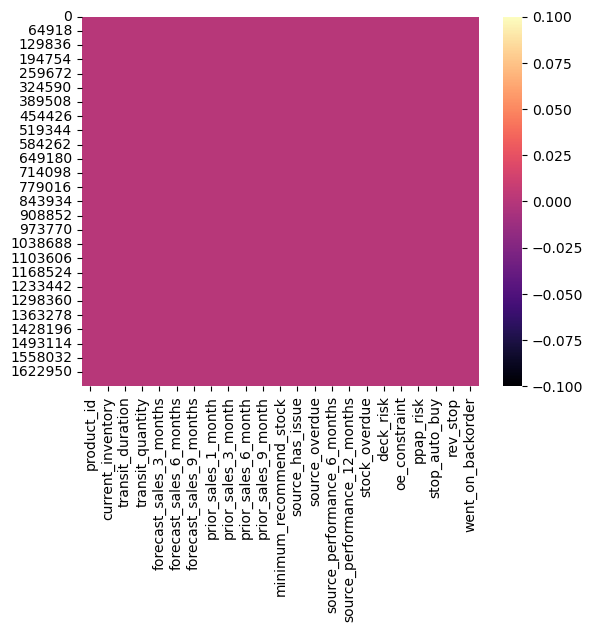

In [27]:
sns.heatmap(df.isnull(), cmap='magma', linecolor='white')

Numerical features

In [28]:
#dropping product_id column
df.drop('product_id',axis=1,inplace=True)  

In [29]:
print("df shape:",df.shape)

df shape: (1687860, 22)


In [30]:
Numerical_features=df.select_dtypes(exclude=['object'])
Numerical_features.columns

Index(['current_inventory', 'transit_duration', 'transit_quantity',
       'forecast_sales_3_months', 'forecast_sales_6_months',
       'forecast_sales_9_months', 'prior_sales_1_month', 'prior_sales_3_month',
       'prior_sales_6_month', 'prior_sales_9_month', 'minimum_recommend_stock',
       'source_overdue', 'source_performance_6_months',
       'source_performance_12_months', 'stock_overdue'],
      dtype='object')

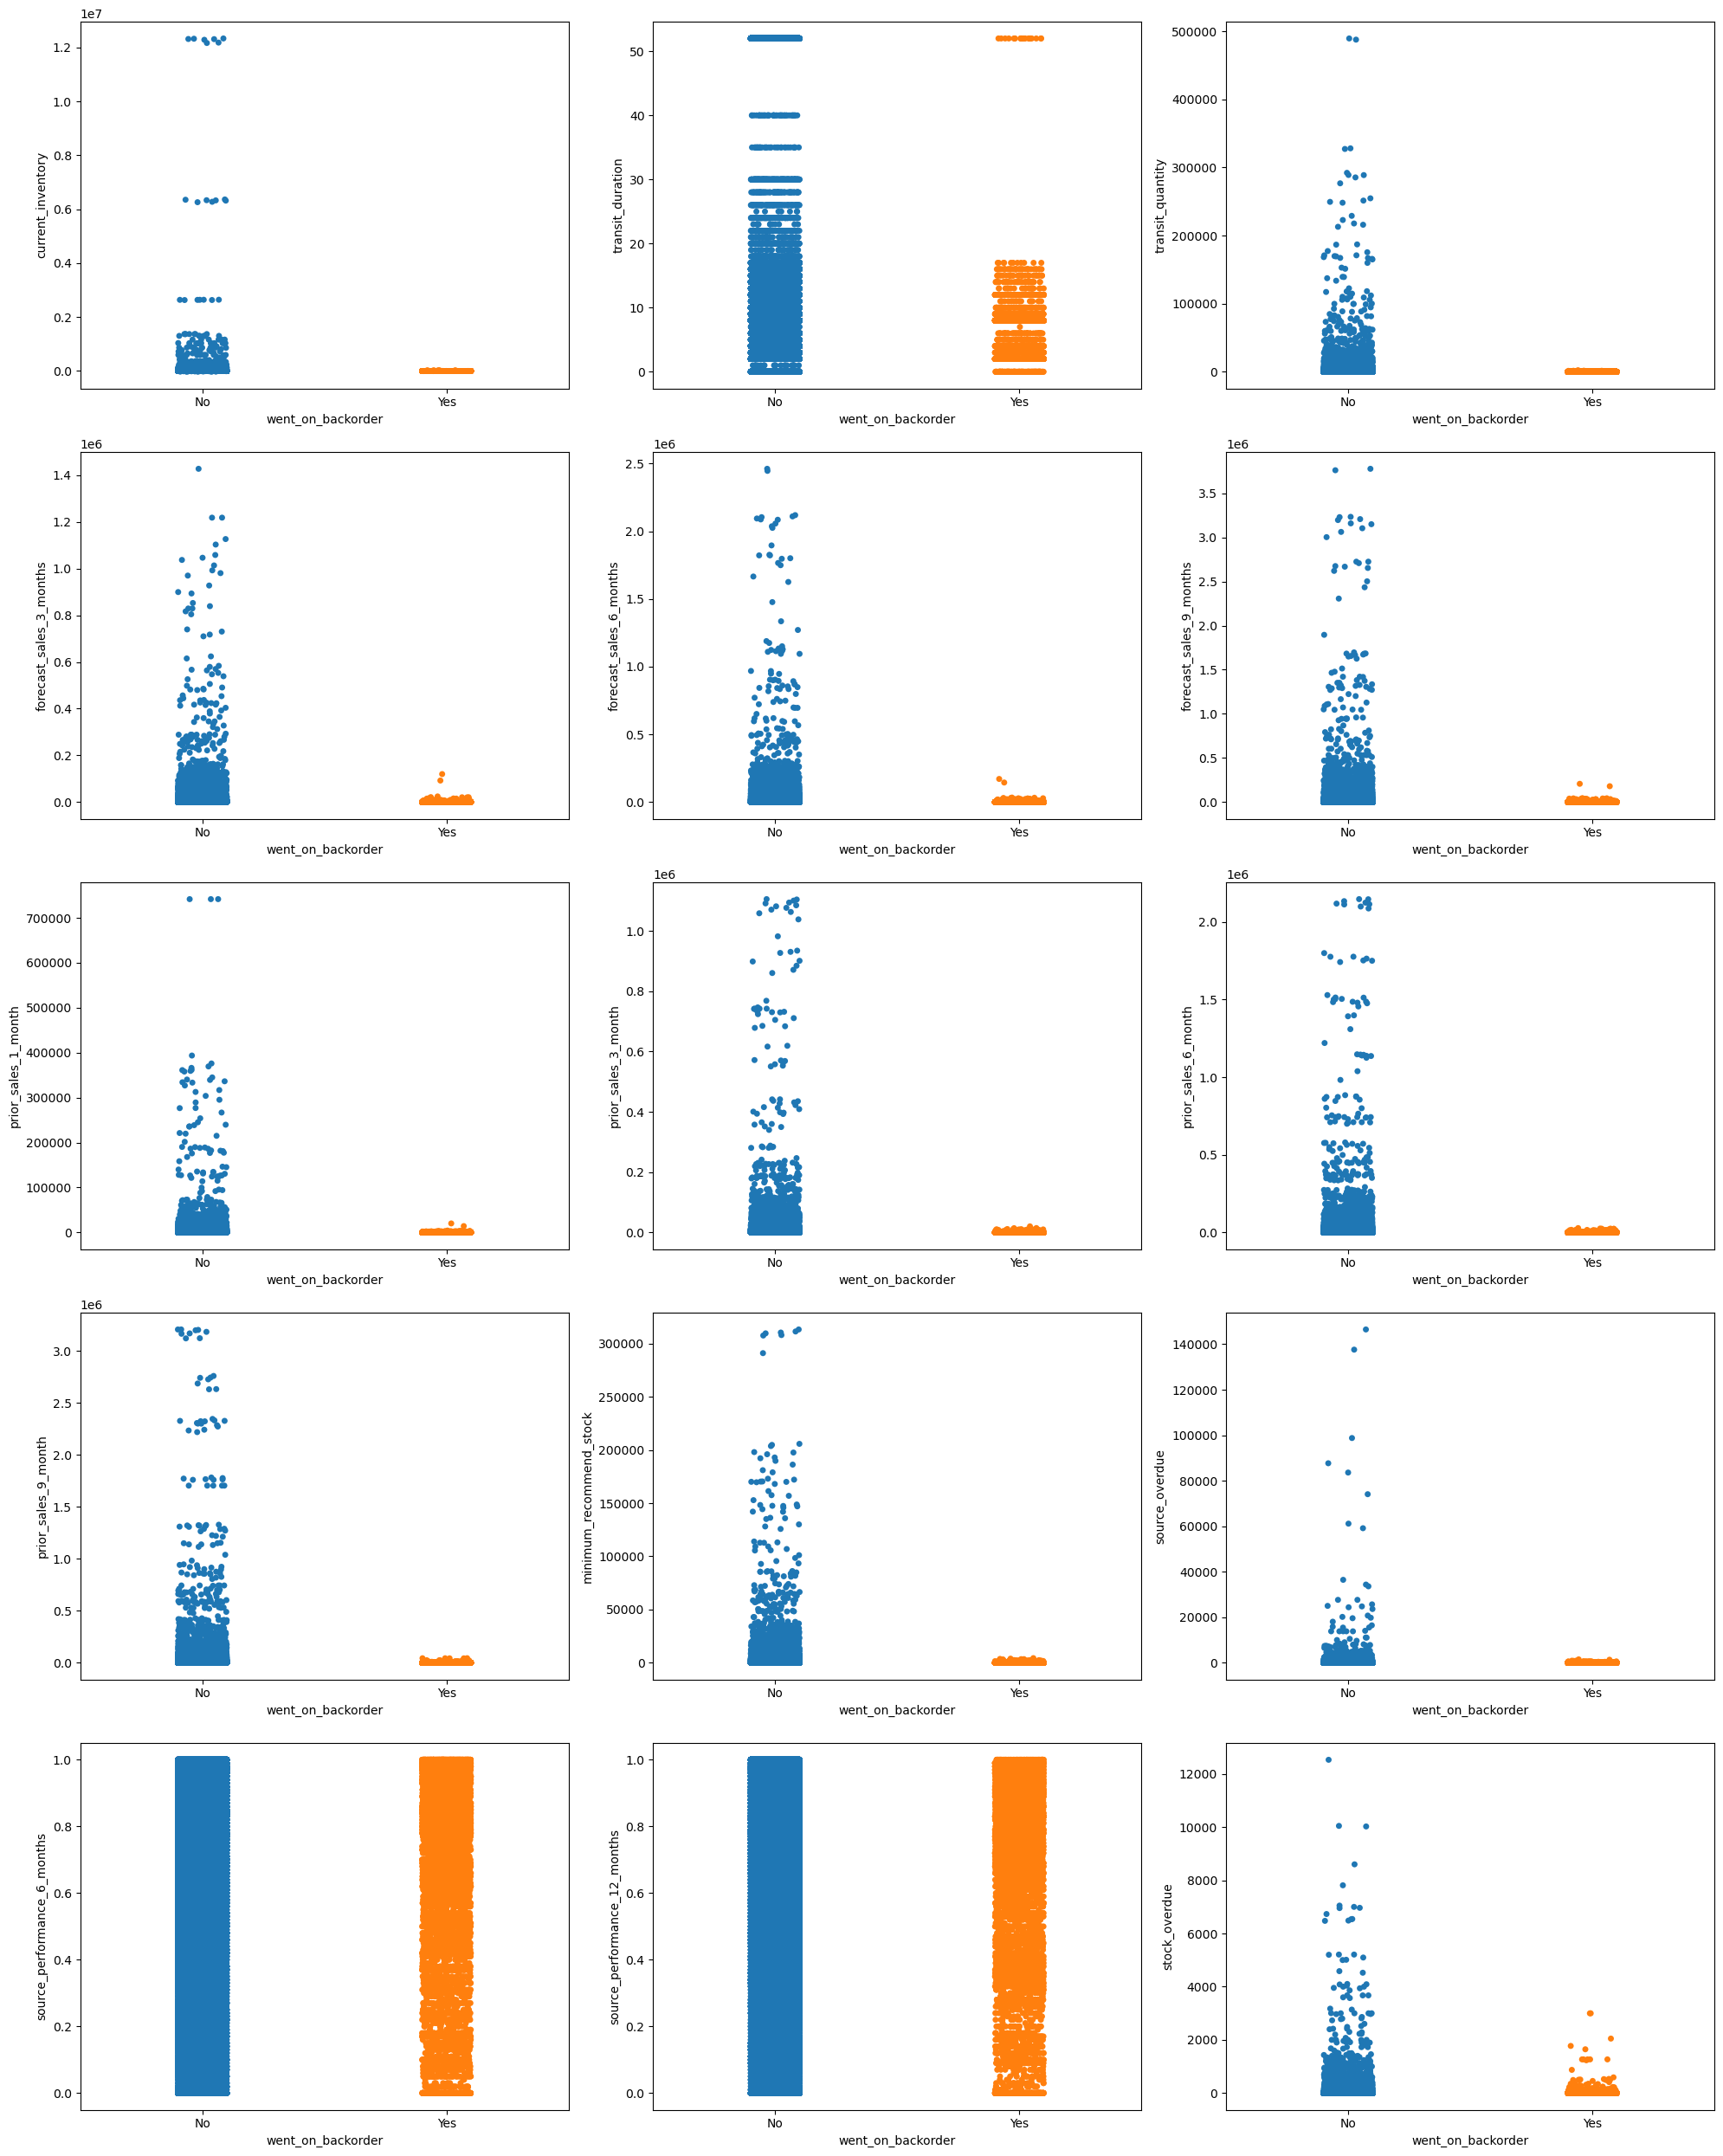

In [31]:
# let's see relationship for target col and every numerical column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in Numerical_features:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        sns.stripplot(df['went_on_backorder'],Numerical_features[column])
    plotnumber+=1
plt.tight_layout()

Categorical values

In [33]:
Categorical_features=df.select_dtypes(include=['object'])
Categorical_features.columns   

Index(['source_has_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [34]:
str=Categorical_features.columns
#encoding of categorical
for col in str:
    df[col] = df[col].map({"Yes" : 1, "No" : 0})

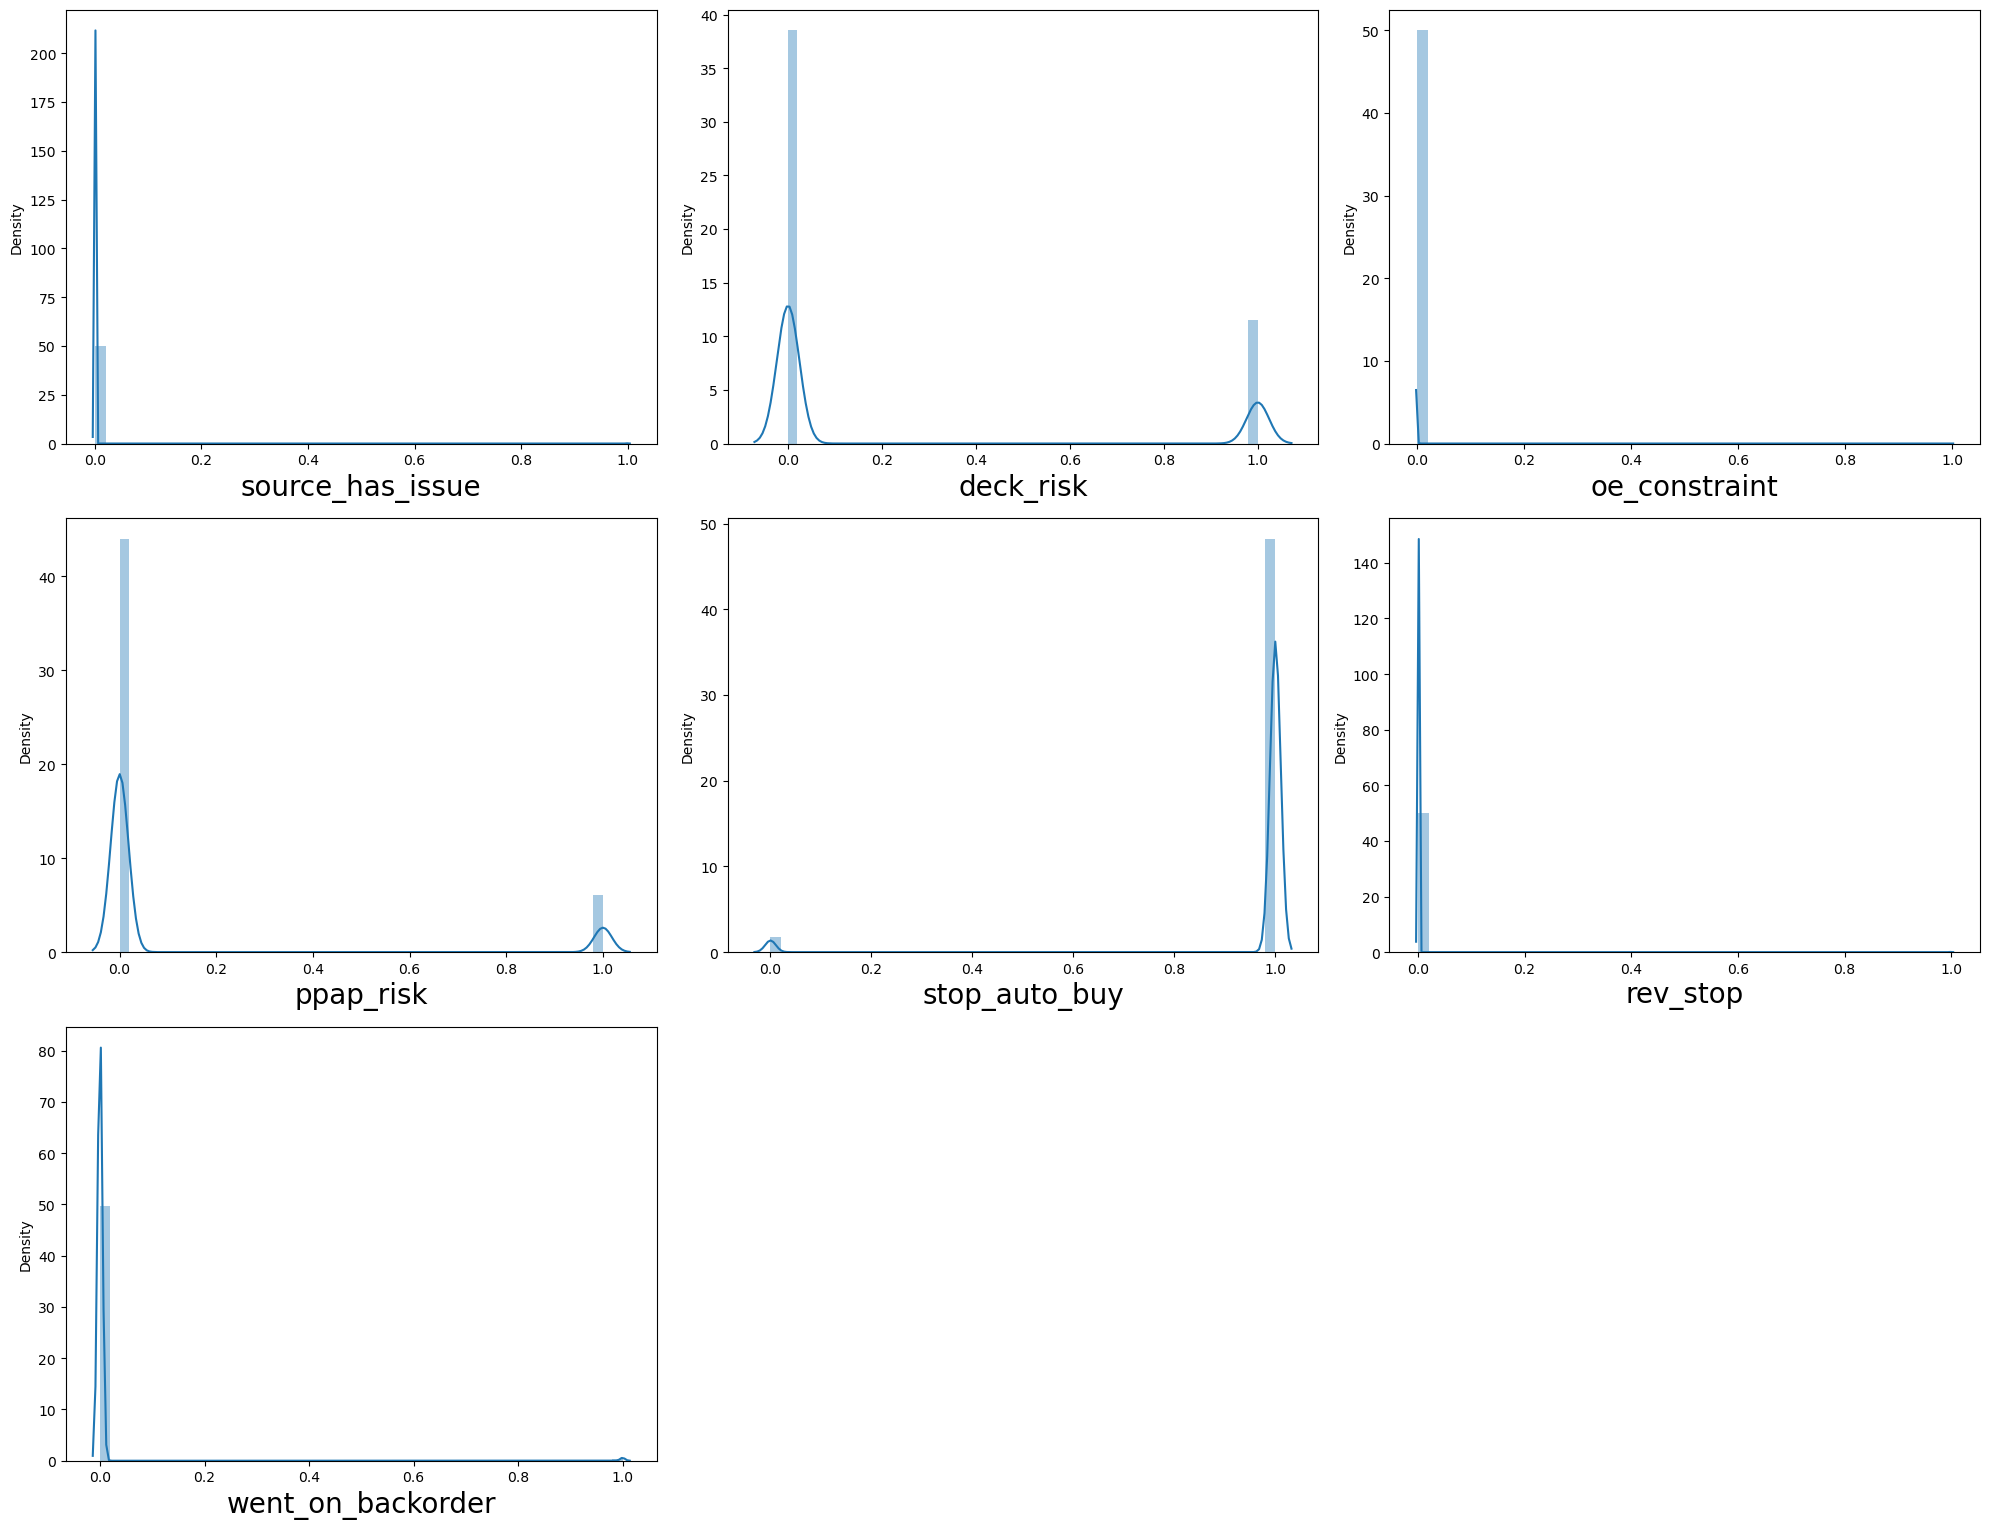

In [36]:
# let's see distributiion of categorical columns
plot.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in Categorical_features:
    if plotnumber<=15 :
        ax = plot.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plot.xlabel(column,fontsize=20)
    plotnumber+=1
plot.tight_layout()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687860 entries, 0 to 1687859
Data columns (total 22 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   current_inventory             1687860 non-null  float64
 1   transit_duration              1687860 non-null  float64
 2   transit_quantity              1687860 non-null  float64
 3   forecast_sales_3_months       1687860 non-null  float64
 4   forecast_sales_6_months       1687860 non-null  float64
 5   forecast_sales_9_months       1687860 non-null  float64
 6   prior_sales_1_month           1687860 non-null  float64
 7   prior_sales_3_month           1687860 non-null  float64
 8   prior_sales_6_month           1687860 non-null  float64
 9   prior_sales_9_month           1687860 non-null  float64
 10  minimum_recommend_stock       1687860 non-null  float64
 11  source_has_issue              1687860 non-null  int64  
 12  source_overdue              

In [38]:
df.to_csv('Backorder_1.csv', index = False)